# ALEXNET

In [1]:
c10_class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
c100_class_name = ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 
                   'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 
                   'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 
                   'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse','mushroom', 'oak_tree', 'orange', 'orchid', 
                   'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 
                   'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 
                   'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 
                   'willow_tree', 'wolf', 'woman', 'worm']

## With default image size of dataset (32,32,3)

In [2]:
#!pip install scikit-image
import keras
import numpy as np
import skimage.transform
from keras.datasets import cifar10, cifar100
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, AveragePooling2D, ZeroPadding2D
from keras import optimizers
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [3]:
def Alexnet(input_shape, num_classes):
    alexnet = Sequential()
    alexnet.add(Conv2D(filters=96,kernel_size=(3,3),strides=(4,4),input_shape=input_shape, activation='relu'))
    alexnet.add(BatchNormalization())
    alexnet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    alexnet.add(Conv2D(256,(5,5),padding='same',activation='relu'))
    alexnet.add(BatchNormalization())
    alexnet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    alexnet.add(Conv2D(384,(3,3),padding='same',activation='relu'))
    alexnet.add(Conv2D(384,(3,3),padding='same',activation='relu'))
    alexnet.add(Conv2D(256,(3,3),padding='same',activation='relu'))
    alexnet.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    alexnet.add(Flatten())
    alexnet.add(Dense(4096, activation='relu'))
    alexnet.add(Dropout(0.4))
    alexnet.add(Dense(4096, activation='relu'))
    alexnet.add(Dropout(0.4))
    alexnet.add(Dense(num_classes,activation='softmax'))

    opt = keras.optimizers.Adam(learning_rate=0.0001)
    alexnet.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
    return alexnet

### CIFAR - 10

In [4]:
# Load data
(c10_x_train_orig, c10_y_train_orig), (c10_x_test_orig, c10_y_test_orig) = cifar10.load_data()

# Pre-processing X
c10_x_train = c10_x_train_orig.astype('float32')
c10_x_test = c10_x_test_orig.astype('float32')
c10_x_train = c10_x_train/255
c10_x_test = c10_x_test/255

# Hyper-parameters
c10_epochs = 25
c10_batch_size = 128
c10_num_classes = 10
c10_input_shape = c10_x_train.shape[1:]

# Pre-processing Y
c10_y_train = keras.utils.to_categorical(c10_y_train_orig, c10_num_classes)
c10_y_test = keras.utils.to_categorical(c10_y_test_orig, c10_num_classes)

print(c10_x_train.shape, c10_x_test.shape, c10_y_train.shape, c10_y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 10) (10000, 10)


In [5]:
c10_alexnet = Alexnet(c10_input_shape, c10_num_classes)
c10_alexnet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 8, 8, 96)          2688      
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 96)          384       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 256)         614656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 4, 4, 256)         1024      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 384)        

In [6]:
c10_alexnet.fit(c10_x_train, c10_y_train, validation_data = (c10_x_test, c10_y_test), batch_size = c10_batch_size, epochs = c10_epochs, shuffle = True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 17s 332us/step - loss: 1.5047 - accuracy: 0.4481 - val_loss: 2.2532 - val_accuracy: 0.2283
Epoch 2/25
50000/50000 [==============================] - 13s 264us/step - loss: 1.1343 - accuracy: 0.5935 - val_loss: 1.2160 - val_accuracy: 0.5687
Epoch 3/25
50000/50000 [==============================] - 13s 264us/step - loss: 0.9257 - accuracy: 0.6705 - val_loss: 1.2689 - val_accuracy: 0.5626
Epoch 4/25
50000/50000 [==============================] - 13s 265us/step - loss: 0.7360 - accuracy: 0.7403 - val_loss: 1.2278 - val_accuracy: 0.5954
Epoch 5/25
50000/50000 [==============================] - 13s 265us/step - loss: 0.5489 - accuracy: 0.8082 - val_loss: 1.2658 - val_accuracy: 0.6047
Epoch 6/25
50000/50000 [==============================] - 13s 265us/step - loss: 0.3736 - accuracy: 0.8713 - val_loss: 1.5401 - val_accuracy: 0.5874
Epoch 7/25
50000/50000 [==============================] 

In [7]:
scores = c10_alexnet.evaluate(c10_x_test, c10_y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 2s 161us/step
Test loss: 2.3238358577728273
Test accuracy: 0.6115000247955322


In [8]:
c10_alexnet.save('c10_alexnet.h5')
c10_alexnet.save_weights('c10_alexnet_weights.h5')

In [9]:
predictions = {}
for i in range(c10_num_classes):
    index = np.where(c10_y_test_orig == i)
    slice_x_test = c10_x_test[index[0]]
    slice_y_test = c10_y_test[index[0]]
    scores = c10_alexnet.evaluate(slice_x_test, slice_y_test, verbose = 0)
    print('Class: ' + c10_class_name[i] + ' Test accuracy: ' + str(scores[1]))
    predictions[c10_class_name[i]] = str(scores[1])

Class: airplane Test accuracy: 0.7200000286102295
Class: automobile Test accuracy: 0.7540000081062317
Class: bird Test accuracy: 0.5360000133514404
Class: cat Test accuracy: 0.42800000309944153
Class: deer Test accuracy: 0.5609999895095825
Class: dog Test accuracy: 0.5709999799728394
Class: frog Test accuracy: 0.593999981880188
Class: horse Test accuracy: 0.6259999871253967
Class: ship Test accuracy: 0.7210000157356262
Class: truck Test accuracy: 0.6039999723434448


### CIFAR - 100

In [4]:
# Load data
(c100_x_train_orig, c100_y_train_orig), (c100_x_test_orig, c100_y_test_orig) = cifar100.load_data()

# Pre-processing X
c100_x_train = c100_x_train_orig.astype('float32')
c100_x_test = c100_x_test_orig.astype('float32')
c100_x_train = c100_x_train/255
c100_x_test = c100_x_test/255

# Hyper-parameters
c100_epochs = 25
c100_batch_size = 128
c100_num_classes = 100
c100_input_shape = c100_x_train.shape[1:]

# Pre-processing Y
c100_y_train = keras.utils.to_categorical(c100_y_train_orig, c100_num_classes)
c100_y_test = keras.utils.to_categorical(c100_y_test_orig, c100_num_classes)

print(c100_x_train.shape, c100_x_test.shape, c100_y_train.shape, c100_y_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 100) (10000, 100)


In [5]:
c100_alexnet = Alexnet(c100_input_shape, c100_num_classes)
#c100_alexnet.summary()

In [6]:
c100_alexnet.fit(c100_x_train, c100_y_train, validation_data = (c100_x_test, c100_y_test), batch_size = c100_batch_size, epochs = c100_epochs, shuffle = True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 17s 333us/step - loss: 3.8535 - accuracy: 0.1037 - val_loss: 4.2551 - val_accuracy: 0.0629
Epoch 2/25
50000/50000 [==============================] - 13s 266us/step - loss: 3.1701 - accuracy: 0.2150 - val_loss: 3.0685 - val_accuracy: 0.2426
Epoch 3/25
50000/50000 [==============================] - 13s 266us/step - loss: 2.7890 - accuracy: 0.2854 - val_loss: 2.8202 - val_accuracy: 0.2922
Epoch 4/25
50000/50000 [==============================] - 13s 268us/step - loss: 2.4754 - accuracy: 0.3480 - val_loss: 2.8258 - val_accuracy: 0.2922
Epoch 5/25
50000/50000 [==============================] - 13s 267us/step - loss: 2.1873 - accuracy: 0.4100 - val_loss: 2.7583 - val_accuracy: 0.3136
Epoch 6/25
50000/50000 [==============================] - 14s 270us/step - loss: 1.8839 - accuracy: 0.4776 - val_loss: 2.9848 - val_accuracy: 0.2933
Epoch 7/25
50000/50000 [==============================] 

In [7]:
scores = c100_alexnet.evaluate(c100_x_test, c100_y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 2s 158us/step
Test loss: 6.276831963348389
Test accuracy: 0.28769999742507935


In [8]:
c100_alexnet.save('c100_alexnet.h5')
c100_alexnet.save_weights('c100_alexnet_weights.h5')

In [10]:
predictions = {}
for i in range(c100_num_classes):
    index = np.where(c100_y_test_orig == i)
    slice_x_test = c100_x_test[index[0]]
    slice_y_test = c100_y_test[index[0]]
    scores = c100_alexnet.evaluate(slice_x_test, slice_y_test, verbose = 0)
    print('Class: ' + c100_class_name[i] + ' Test accuracy: ' + str(scores[1]))
    predictions[c100_class_name[i]] = str(scores[1])

Class: apple Test accuracy: 0.44999998807907104
Class: aquarium_fish Test accuracy: 0.4399999976158142
Class: baby Test accuracy: 0.1599999964237213
Class: bear Test accuracy: 0.18000000715255737
Class: beaver Test accuracy: 0.07999999821186066
Class: bed Test accuracy: 0.27000001072883606
Class: bee Test accuracy: 0.33000001311302185
Class: beetle Test accuracy: 0.4099999964237213
Class: bicycle Test accuracy: 0.33000001311302185
Class: bottle Test accuracy: 0.2800000011920929
Class: bowl Test accuracy: 0.15000000596046448
Class: boy Test accuracy: 0.11999999731779099
Class: bridge Test accuracy: 0.3199999928474426
Class: bus Test accuracy: 0.23999999463558197
Class: butterfly Test accuracy: 0.23000000417232513
Class: camel Test accuracy: 0.09000000357627869
Class: can Test accuracy: 0.25
Class: castle Test accuracy: 0.4300000071525574
Class: caterpillar Test accuracy: 0.27000001072883606
Class: cattle Test accuracy: 0.18000000715255737
Class: chair Test accuracy: 0.3400000035762787
C

## With Resizing Images to (224,224,3)

In [1]:
import keras
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10, cifar100
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, AveragePooling2D, ZeroPadding2D
from keras.initializers import he_normal, glorot_uniform
from keras import optimizers
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


In [2]:
def preprocess_image(X, image_height=224, image_width=224):
    X_resize = []
    for i in range(len(X)):
        #X[i] = X[i] / 255.0
        X_resize.append(cv2.resize(X[i], (image_height, image_width)))
    return np.asarray(X_resize)

In [3]:
def Alexnet1(input_shape, num_classes):
    alexnet = Sequential()
    alexnet.add(Conv2D(filters=96,kernel_size=(11,11),strides=(4,4),input_shape=input_shape, activation='relu', padding = 'same', kernel_initializer=he_normal()))
    alexnet.add(BatchNormalization())
    alexnet.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
    alexnet.add(Conv2D(256,(5,5),padding='same',activation='relu', kernel_initializer=he_normal()))
    alexnet.add(BatchNormalization())
    alexnet.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
    alexnet.add(Conv2D(384,(3,3),padding='same',activation='relu', kernel_initializer=he_normal()))
    alexnet.add(Conv2D(384,(3,3),padding='same',activation='relu', kernel_initializer=he_normal()))
    alexnet.add(Conv2D(256,(3,3),padding='same',activation='relu', kernel_initializer=he_normal()))
    alexnet.add(MaxPooling2D(pool_size=(3,3),strides=(2,2)))
    alexnet.add(Flatten())
    alexnet.add(Dense(4096, activation='relu', kernel_initializer=he_normal()))
    alexnet.add(Dropout(0.4))
    alexnet.add(Dense(4096, activation='relu', kernel_initializer=he_normal()))
    alexnet.add(Dropout(0.4))
    alexnet.add(Dense(num_classes,activation='softmax', kernel_initializer=he_normal()))

    opt = keras.optimizers.Adam(learning_rate=0.0001)
    alexnet.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
    return alexnet

### CIFAR - 10

In [4]:
# Load data
(c10_x_train_orig, c10_y_train_orig), (c10_x_test_orig, c10_y_test_orig) = cifar10.load_data()

# Pre-processing X
c10_x_train = preprocess_image(c10_x_train_orig)
c10_x_test = preprocess_image(c10_x_test_orig)

# Hyper-parameters
c10_epochs = 10
c10_batch_size = 128
c10_num_classes = 10
c10_input_shape = c10_x_train.shape[1:]

# Pre-processing Y
c10_y_train = keras.utils.to_categorical(c10_y_train_orig, c10_num_classes)
c10_y_test = keras.utils.to_categorical(c10_y_test_orig, c10_num_classes)

print(c10_x_train.shape, c10_x_test.shape, c10_y_train.shape, c10_y_test.shape)

(50000, 224, 224, 3) (10000, 224, 224, 3) (50000, 10) (10000, 10)


In [5]:
c10_alexnet = Alexnet1(c10_input_shape, c10_num_classes)
c10_alexnet.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 56, 56, 96)        34944     
_________________________________________________________________
batch_normalization_1 (Batch (None, 56, 56, 96)        384       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
batch_normalization_2 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 384)      

In [6]:
c10_alexnet.fit(c10_x_train, c10_y_train, validation_data = (c10_x_test, c10_y_test), batch_size = c10_batch_size, epochs = c10_epochs, shuffle = True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 96s 2ms/step - loss: 1.6628 - accuracy: 0.4453 - val_loss: 1.3003 - val_accuracy: 0.5362
Epoch 2/10
50000/50000 [==============================] - 88s 2ms/step - loss: 1.0672 - accuracy: 0.6195 - val_loss: 0.9996 - val_accuracy: 0.6477
Epoch 3/10
50000/50000 [==============================] - 88s 2ms/step - loss: 0.8262 - accuracy: 0.7086 - val_loss: 0.9611 - val_accuracy: 0.6597
Epoch 4/10
50000/50000 [==============================] - 89s 2ms/step - loss: 0.6571 - accuracy: 0.7703 - val_loss: 0.7430 - val_accuracy: 0.7378
Epoch 5/10
50000/50000 [==============================] - 89s 2ms/step - loss: 0.5150 - accuracy: 0.8207 - val_loss: 0.7326 - val_accuracy: 0.7514
Epoch 6/10
50000/50000 [==============================] - 89s 2ms/step - loss: 0.3822 - accuracy: 0.8659 - val_loss: 0.9659 - val_accuracy: 0.7025
Epoch 7/10
50000/50000 [==============================] - 90s 2ms/st

In [7]:
scores = c10_alexnet.evaluate(c10_x_test, c10_y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 8s 822us/step
Test loss: 0.9744510487556457
Test accuracy: 0.7613999843597412


In [10]:
c10_alexnet.save('c10_alexnet_1.h5')
c10_alexnet.save_weights('c10_alexnet_weights_1.h5')

In [13]:
predictions = {}
for i in range(c10_num_classes):
    index = np.where(c10_y_test_orig == i)
    slice_x_test = c10_x_test[index[0]]
    slice_y_test = c10_y_test[index[0]]
    scores = c10_alexnet.evaluate(slice_x_test, slice_y_test, verbose = 0)
    print('Class: ' + c10_class_name[i] + ' Test accuracy: ' + str(scores[1]))
    predictions[c10_class_name[i]] = str(scores[1])

Class: airplane Test accuracy: 0.7760000228881836
Class: automobile Test accuracy: 0.8240000009536743
Class: bird Test accuracy: 0.7250000238418579
Class: cat Test accuracy: 0.47600001096725464
Class: deer Test accuracy: 0.718999981880188
Class: dog Test accuracy: 0.7099999785423279
Class: frog Test accuracy: 0.8420000076293945
Class: horse Test accuracy: 0.7739999890327454
Class: ship Test accuracy: 0.8920000195503235
Class: truck Test accuracy: 0.8759999871253967


### CIFAR - 100

In [28]:
# Load data
(c100_x_train_orig, c100_y_train_orig), (c100_x_test_orig, c100_y_test_orig) = cifar100.load_data()

# Pre-processing X
c100_x_train = preprocess_image(c100_x_train_orig)
c100_x_test = preprocess_image(c100_x_test_orig)

# Hyper-parameters
c100_epochs = 25
c100_batch_size = 32
c100_num_classes = 100
c100_input_shape = c100_x_train.shape[1:]

# Pre-processing Y
c100_y_train = keras.utils.to_categorical(c100_y_train_orig, c100_num_classes)
c100_y_test = keras.utils.to_categorical(c100_y_test_orig, c100_num_classes)

print(c100_x_train.shape, c100_y_train.shape, c100_x_test.shape, c100_y_test.shape)

(50000, 224, 224, 3) (50000, 100) (10000, 224, 224, 3) (10000, 100)


In [5]:
c100_alexnet = Alexnet1(c100_input_shape, c100_num_classes)
#c100_alexnet.summary()

In [6]:
c100_alexnet.fit(c100_x_train, c100_y_train, validation_data = (c100_x_test, c100_y_test), batch_size = c100_batch_size, epochs = c100_epochs, shuffle = True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 150s 3ms/step - loss: 3.7585 - accuracy: 0.1397 - val_loss: 3.1175 - val_accuracy: 0.2416
Epoch 2/25
50000/50000 [==============================] - 142s 3ms/step - loss: 2.8407 - accuracy: 0.2923 - val_loss: 2.5220 - val_accuracy: 0.3633
Epoch 3/25
50000/50000 [==============================] - 142s 3ms/step - loss: 2.3220 - accuracy: 0.3980 - val_loss: 2.3285 - val_accuracy: 0.3982
Epoch 4/25
50000/50000 [==============================] - 142s 3ms/step - loss: 1.8845 - accuracy: 0.4943 - val_loss: 2.0602 - val_accuracy: 0.4617
Epoch 5/25
50000/50000 [==============================] - 142s 3ms/step - loss: 1.4656 - accuracy: 0.5927 - val_loss: 2.1998 - val_accuracy: 0.4507
Epoch 6/25
50000/50000 [==============================] - 140s 3ms/step - loss: 1.0347 - accuracy: 0.7010 - val_loss: 2.1080 - val_accuracy: 0.4711
Epoch 7/25
50000/50000 [==============================] - 142s

In [7]:
scores = c100_alexnet.evaluate(c100_x_test, c100_y_test)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 8s 827us/step
Test loss: 3.417057720184326
Test accuracy: 0.49300000071525574


In [17]:
c100_alexnet.save('c100_alexnet_1.h5')
c100_alexnet.save_weights('c100_alexnet_weights_1.h5')

In [89]:
predictions = {}
for i in range(c100_num_classes):
    index = np.where(c100_y_test_orig == i)
    slice_x_test = c100_x_test[index[0]]
    slice_y_test = c100_y_test[index[0]]
    scores = c100_alexnet.evaluate(slice_x_test, slice_y_test, verbose = 0)
    print('Class: ' + c100_class_name[i] + ' Test accuracy: ' + str(scores[1]))
    predictions[c100_class_name[i]] = str(scores[1])

Class: apple Test accuracy: 0.8500000238418579
Class: aquarium_fish Test accuracy: 0.5099999904632568
Class: baby Test accuracy: 0.3400000035762787
Class: bear Test accuracy: 0.23999999463558197
Class: beaver Test accuracy: 0.30000001192092896
Class: bed Test accuracy: 0.4399999976158142
Class: bee Test accuracy: 0.6399999856948853
Class: beetle Test accuracy: 0.49000000953674316
Class: bicycle Test accuracy: 0.5799999833106995
Class: bottle Test accuracy: 0.6399999856948853
Class: bowl Test accuracy: 0.23000000417232513
Class: boy Test accuracy: 0.27000001072883606
Class: bridge Test accuracy: 0.47999998927116394
Class: bus Test accuracy: 0.44999998807907104
Class: butterfly Test accuracy: 0.3400000035762787
Class: camel Test accuracy: 0.41999998688697815
Class: can Test accuracy: 0.38999998569488525
Class: castle Test accuracy: 0.75
Class: caterpillar Test accuracy: 0.36000001430511475
Class: cattle Test accuracy: 0.49000000953674316
Class: chair Test accuracy: 0.7799999713897705
Cla

## Trial

Class: automobile
Test accuracy: 0.8240000009536743


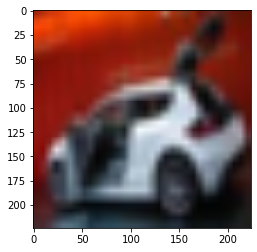

In [28]:
# Checking the correctness of labels

i = 1
index = np.where(c10_y_test_orig == i)
slice_x_test = c10_x_test[index[0]]
slice_y_test = c10_y_test[index[0]]
scores = c10_alexnet.evaluate(slice_x_test, slice_y_test, verbose = 0)
print('Class: ' + c10_class_name[i])
print('Test accuracy:', scores[1])
plt.imshow(slice_x_test[0])